In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = "data"
os.listdir(path)

['LARD_ADM_SECT_SGG_서울',
 'LARD_ADM_SECT_SGG_서울.zip',
 'LSMD_ADM_SECT_UMD_서울',
 'LSMD_ADM_SECT_UMD_서울.zip',
 '서울시버스정류소위치정보(20240507).xlsx',
 '전기차 충전소 설치현황_20240508.xls']

In [3]:
path = "data\LARD_ADM_SECT_SGG_서울"
os.listdir(path)

['LARD_ADM_SECT_SGG_11_202403.cst',
 'LARD_ADM_SECT_SGG_11_202403.dbf',
 'LARD_ADM_SECT_SGG_11_202403.fix',
 'LARD_ADM_SECT_SGG_11_202403.prj',
 'LARD_ADM_SECT_SGG_11_202403.shp',
 'LARD_ADM_SECT_SGG_11_202403.shx']

In [18]:
sgg = gpd.read_file("data\LARD_ADM_SECT_SGG_서울\LARD_ADM_SECT_SGG_11_202403.shp", encoding="EUC-KR")
sgg.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
0,11110,종로구,11,11110,"POLYGON ((197747.184 559404.315, 197816.140 55..."
1,11140,중구,34,11140,"POLYGON ((199180.554 552312.131, 199200.913 55..."
2,11170,용산구,1,11170,"POLYGON ((195172.982 548501.400, 195174.938 54..."
3,11200,성동구,1,11200,"POLYGON ((202436.417 551969.825, 202411.174 55..."
4,11215,광진구,49,11215,"POLYGON ((206870.480 547252.451, 206638.541 54..."


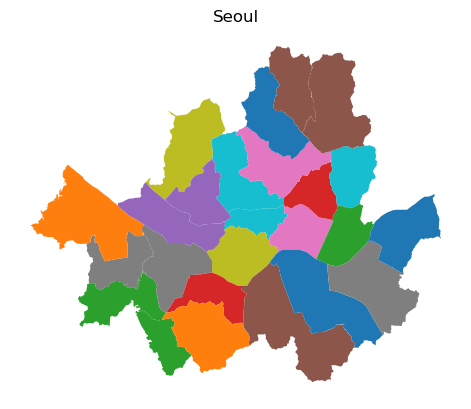

In [23]:
ax = sgg.plot(column='SGG_NM', categorical=True)
ax.set_axis_off()
ax.set_title("Seoul")
plt.show()

In [25]:
# 좌표계 확인
sgg.crs

<Bound CRS: PROJCS["Korea 2000 / Central Belt 2010",GEOGCS["Ko ...>
Name: Korea 2000 / Central Belt 2010
Axis Info [cartesian]:
- [east]: Easting (m)
- [north]: Northing (m)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from Korea 2000 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: Korea 2000 / Central Belt 2010

In [28]:
# 좌표계 변환
sgg = sgg.to_crs(epsg=5179)
sgg.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
# Geopackage로 변환하여 저장
# shp파일의 단점(dbf와 shx가 꼭 필요하여 단일파일 사용이 어려움, 용량제한2gb, 속도 등..)때문에 gpkg파일로 변환하여 사용하는게 유리함.
sgg.to_file("data\서울시_시군구_5179.gpkg", driver="GPKG", encoding="UTF-8")

In [31]:
path = "data\LSMD_ADM_SECT_UMD_서울"
os.listdir(path)

['LSMD_ADM_SECT_UMD_11_202403.cst',
 'LSMD_ADM_SECT_UMD_11_202403.dbf',
 'LSMD_ADM_SECT_UMD_11_202403.fix',
 'LSMD_ADM_SECT_UMD_11_202403.prj',
 'LSMD_ADM_SECT_UMD_11_202403.shp',
 'LSMD_ADM_SECT_UMD_11_202403.shx']

In [35]:
umd = gpd.read_file("data\LSMD_ADM_SECT_UMD_서울\LSMD_ADM_SECT_UMD_11_202403.shp", encoding="EUC-KR")
umd.head()

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry
0,11110101,11110,청운동,1036,"POLYGON ((196593.774 554114.361, 196611.342 55..."
1,11110102,11110,신교동,307,"POLYGON ((196912.513 554003.597, 196920.988 55..."
2,11110103,11110,궁정동,1034,"POLYGON ((197377.934 553847.046, 197388.359 55..."
3,11110104,11110,효자동,309,"POLYGON ((197664.978 553742.317, 197663.825 55..."
4,11110105,11110,창성동,316,"POLYGON ((197662.098 553585.836, 197662.501 55..."


In [37]:
umd = umd.to_crs(epsg=5179)
umd.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [38]:
umd.to_file("data\서울시_읍면동_5179.gpkg", driver="GPKG", encoding="UTF-8")